In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/content/train.csv")

In [4]:
data.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [5]:
data.drop("ID", axis=1, inplace=True)
x = data[["ABSTRACT"]]
y = data.drop(["TITLE","ABSTRACT"], axis=1)

In [6]:
for i in range(y.shape[0]):
    if y.loc[i, "Statistics"]==1:
        y.loc[i, "Mathematics"]=1
y.drop(["Quantitative Finance", "Quantitative Biology", "Statistics"], axis=1, inplace=True)

In [7]:
unlabeled = pd.read_csv("/content/test.csv")

In [10]:
unlabeled.shape

(8989, 3)

In [11]:
unlabeled.index = range(20972,20971+8989+1)

In [12]:
unlabeled

,ID,TITLE,ABSTRACT
20972,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...
20973,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...
20974,20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...
20975,20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...
20976,20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...
...,...,...,...
29956,29957,Supporting mixed-datatype matrix multiplicatio...,We approach the problem of implementing mixe...
29957,29958,An axiomatic basis for Blackwell optimality,In the theory of Markov decision processes (...
29958,29959,GeneVis - An interactive visualization tool fo...,GeneVis is a web-based tool to visualize com...
29959,29960,Quantifying the causal effect of speed cameras...,This paper quantifies the effect of speed ca...


In [13]:
unlabeled.drop("ID", axis=1, inplace=True)

In [14]:
corpus = pd.concat([x, unlabeled])["ABSTRACT"]

In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [18]:
from nltk.stem import WordNetLemmatizer
lemmer=WordNetLemmatizer()

In [20]:
tfidf = TfidfVectorizer(stop_words=["and", "is", "are", "the", "a", "on"], max_features=25000).fit(raw_documents=corpus)
bow = CountVectorizer(stop_words=["and", "is", "are", "the", "a", "on"], max_features=25000).fit(raw_documents=corpus)

In [21]:
bowdata = bow.transform(corpus)
tfidfdata = tfidf.transform(corpus)

In [22]:
from sklearn.decomposition import LatentDirichletAllocation

In [23]:
lda = LatentDirichletAllocation(n_components=y.shape[1], random_state=11, learning_method="online")

In [24]:
bowdist = lda.fit_transform(bowdata)
tfidfdist = lda.fit_transform(tfidfdata)

In [25]:
bowmaintopics = np.argmax(bowdist, axis=1)
bowdist = pd.DataFrame(bowdist, columns=["Topic "+str(i) for i in range(1,4)])
bowdist["LDA-MainTopic"]=bowmaintopics

tfidfmaintopics = np.argmax(tfidfdist, axis=1)
tfidfdist = pd.DataFrame(tfidfdist, columns=["Topic "+str(i) for i in range(1,4)])
tfidfdist["LDA-MainTopic"]=tfidfmaintopics

In [26]:
realtopic=y.idxmax(axis=1)

Text(0.5, 1.0, '\nTF-IDF + LDA\n')

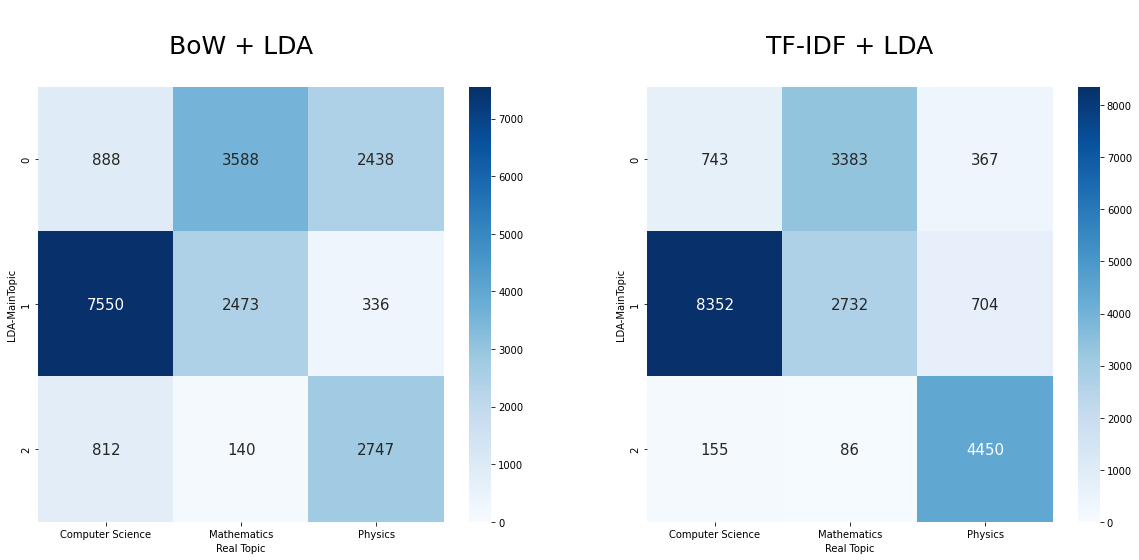

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

sns.heatmap(pd.crosstab(bowdist["LDA-MainTopic"], realtopic), annot=True, fmt="d", annot_kws={"fontsize":15}, cmap="Blues", vmin=0, ax=axes[0])
axes[0].set_xlabel("Real Topic")
axes[0].set_title("\nBoW + LDA\n", fontsize=25)

sns.heatmap(pd.crosstab(tfidfdist["LDA-MainTopic"], realtopic), annot=True, fmt="d", annot_kws={"fontsize":15}, cmap="Blues", vmin=0, ax=axes[1])
axes[1].set_xlabel("Real Topic")
axes[1].set_title("\nTF-IDF + LDA\n", fontsize=25)